# Read the predictions from the annot xml files and convert them into GIS shapefiles

In [1]:
# cell 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# cell 2
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.8 MB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 
     |████████████████████████████████| 16.7 MB 211 kB/s 


In [3]:
import os
#batch_group = "pa_northcentral_2019_b19"
#batch_group = "pa_allentown_2016"
#batch_group = "pa_3_county_south_central_2018_d18"
#batch_group = "pa_luzernecounty_2018"
#batch_group = "pa_sandy_2014"
#batch_group = "pa_south_central_b1_2017"
#batch_group = "pa_south_central_b2_2017"
#batch_group = "pa_dauphin_2016"
batch_group = "pa_westernpa_2019_d20"
#batch_group = "de_delawarevalley_hd_2015"
#batch_group ="md-pa_sandysupp_2014"

dem_tif_fp = os.path.join("/content/drive/MyDrive/crane_pennsylvania/dem/",batch_group)
slope_tif_fp = os.path.join("/content/drive/MyDrive/crane_pennsylvania/slope/",batch_group)
slope_tif_tiles_fp = os.path.join(slope_tif_fp,"tiles640/")
slope_tif_tiles_jpgs_fp = os.path.join(slope_tif_tiles_fp,"jpgs/")
prediction_xmls_fp = '/content/drive/MyDrive/crane_pennsylvania/predictions/project_'+batch_group+'/xmls/'
prediction_fp = '/content/drive/MyDrive/crane_pennsylvania/predictions/project_'+batch_group+'/'
#dem_tif_fp, slope_tif_fp, slope_tif_tiles_fp, slope_tif_tiles_jpgs_fp, prediction_xmls_fp


training_fp = '/content/drive/MyDrive/crane_pennsylvania/training_images/'
training_tifs_fp = os.path.join(training_fp, 'tifs/')
training_jpgs_fp = os.path.join(training_fp, 'jpgs/')
training_xmls_fp = os.path.join(training_fp, 'xmls/')
training_txts_fp = os.path.join(training_fp, 'txts/')

training_yolov5pytorch_fp = os.path.join(training_fp, 'yolov5pytorch/')

#test
yolo_test_fp = os.path.join(training_yolov5pytorch_fp, 'test/')
yolo_test_images_fp = os.path.join(yolo_test_fp, 'images/')

#set targets to collect preductions from
target_xmls_fp = prediction_xmls_fp
target_tifs_fp = slope_tif_tiles_fp
target_jpgs_fp = slope_tif_tiles_jpgs_fp

In [4]:
import time
import os
def check_number_of_files(folder_path, file_extension):
    counter = 0
    try:
        for filename in os.listdir(folder_path):
            ext = filename[-1*(len(file_extension)):]
            if(ext == file_extension):
               counter = counter + 1            
        print("found: ",counter," files in ", folder_path)
    except:
        print("had an exception")         
        check_number_of_files(folder_path, file_extension)
        
def list_of_files(source_directory, source_extension):
    start_time = time.time()  
    files_list = []  
    counter = 0
    for path, subdirs, files in os.walk(source_directory):
        for name in files:
            #print(name)      
            if(name[-4:] == source_extension):
                counter = counter + 1
                #print(counter, os.path.join(path, name))
                files_list.append(os.path.join(path, name))
    execution_time = (time.time() - start_time)
    print('Execution time in seconds: ' + str(execution_time))                
    return(files_list)    

In [9]:
tifs_list = list_of_files(target_tifs_fp, ".tif")  
print(len(tifs_list), "in", target_tifs_fp)

Execution time in seconds: 89.08364868164062
117944 in /content/drive/MyDrive/crane_pennsylvania/slope/pa_westernpa_2019_d20/tiles640/


In [7]:
jpgs_list = list_of_files(target_jpgs_fp, ".jpg")  
print(len(jpgs_list))

Execution time in seconds: 278.4686427116394
117760


In [8]:
xmls_list = list_of_files(target_xmls_fp, ".xml")  
print(len(xmls_list))

Execution time in seconds: 178.28897166252136
117760


In [10]:
# Dictionary of slope_tifs
# Sometimes there are input/output errors and timeouts with Google Drive.  If odd results like a wrong count are produced, re-run this

slope_tifs_dict = {}
for file_path in tifs_list:
    file_name = file_path.split(sep="/")[-1]
    slope_tifs_dict[file_name[:-4]]=file_name

slope_jpgs_dict = {}
for file_path in jpgs_list:
    # be careful comparing a partial filename
    file_name = file_path.split(sep="/")[-1]    
    slope_jpgs_dict[file_name[:-4]]=file_name

print("There are: ",len(slope_tifs_dict)," tif files in ", target_tifs_fp)
print("There are: ",len(slope_jpgs_dict)," jpg files in ", target_jpgs_fp)
for dict_key in slope_tifs_dict:
    if not dict_key in slope_jpgs_dict:
        print(dict_key, " (tif) is not in jpgs directory.")

for dict_key in slope_jpgs_dict:
    if not dict_key in slope_tifs_dict:
        print(dict_key, " (jpg) is not in tifs directory.")

There are:  117760  tif files in  /content/drive/MyDrive/crane_pennsylvania/slope/pa_westernpa_2019_d20/tiles640/
There are:  117760  jpg files in  /content/drive/MyDrive/crane_pennsylvania/slope/pa_westernpa_2019_d20/tiles640/jpgs/


In [11]:
xmls_dict = {}
for file_path in xmls_list:
    file_name = file_path.split(sep="/")[-1]  
    xmls_dict[file_name[:-4]]=file_name

print("There are: ",len(xmls_dict)," xml files in ", target_xmls_fp)
for dict_key in xmls_dict:
    if not dict_key in slope_jpgs_dict:
        print(dict_key, " (xml) is not in jpgs directory.")

#print("There are: ",len(slope_jpgs_dict)," jpg files in ", slope_jpgs_fp)
for dict_key in slope_jpgs_dict:
    if not dict_key in xmls_dict:
        print(dict_key, " (jpg) is not in xmls directory.")

There are:  117760  xml files in  /content/drive/MyDrive/crane_pennsylvania/predictions/project_pa_westernpa_2019_d20/xmls/


In [12]:
# cell 3 - Run this load these functions
def get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,x,y):
    # supposing x and y are your pixel coordinate this 
    # is how to get the coordinate in space.
    posX = px_w * x + rot1 * y + xoffset
    posY = rot2 * x + px_h * y + yoffset

    # shift to the center of the pixel
    posX += px_w / 2.0
    posY += px_h / 2.0
    return posX,posY

# rewite this to pass an open dataset

def get_poly_from_geotif_with_x_y(geotif_fp,minx,miny,maxx,maxy):
    ds = gdal.Open(geotif_fp)
    # open the dataset and get the geo transform matrix

    xoffset, px_w, rot1, yoffset, rot2,px_h = ds.GetGeoTransform()

    #print("xoffset, px_w, rot1, yoffset, px_h, rot2",xoffset, px_w, rot1, yoffset, px_h, rot2)
    #print("minx,miny,maxx,maxy",minx,miny,maxx,maxy)

    pos1x,pos1y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,minx,miny)
    pos2x,pos2y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,minx,maxy)
    pos3x,pos3y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,maxx,maxy)
    pos4x,pos4y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,maxx,miny)
    coords = [(pos1x,pos1y), (pos2x,pos2y), (pos3x,pos3y), (pos4x,pos4y)]

    #print("pos",pos1x,pos1y,pos2x,pos2y,pos3x,pos3y,pos4x,pos4y)
    poly = Polygon(coords)
    
    return poly

def get_poly_from_ds_with_x_y(ds,minx,miny,maxx,maxy):
    
    # open the dataset and get the geo transform matrix

    xoffset, px_w, rot1, yoffset, rot2,px_h = ds.GetGeoTransform()

    #print("xoffset, px_w, rot1, yoffset, px_h, rot2",xoffset, px_w, rot1, yoffset, px_h, rot2)
    #print("minx,miny,maxx,maxy",minx,miny,maxx,maxy)

    pos1x,pos1y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,minx,miny)
    pos2x,pos2y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,minx,maxy)
    pos3x,pos3y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,maxx,maxy)
    pos4x,pos4y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,maxx,miny)
    coords = [(pos1x,pos1y), (pos2x,pos2y), (pos3x,pos3y), (pos4x,pos4y)]

    #print("pos",pos1x,pos1y,pos2x,pos2y,pos3x,pos3y,pos4x,pos4y)
    poly = Polygon(coords)
    
    return poly 


In [13]:
# cell 4 - Run this to load a dictionary of files to process
# Looping through them repeatedly takes a long time.
# Instead, create a dictionary of files indexed by area. Each entry holds a list of matching files
# This makes it easier to process these files by area.

import csv
import os
from os import listdir
construction_type = "charcoal_hearth_hill"
#cfg_name = 'cfg20200826T2315'

#make a dict of all the areas + pan (or pas)
area_crs_dict = {}
area_crs_dict[batch_group] = []

# Now that the dictionary is created, add all of the matching files as a list linked to the entry.
# This dictionary will be used below.

annot_prediction_folder = prediction_xmls_fp

for annot_filename in listdir(annot_prediction_folder):
    annot_area = batch_group
    #print(annot_filename, annot_area)
    area_node = area_crs_dict[annot_area]
    area_node.append(annot_filename)
print(area_crs_dict) 

{'pa_westernpa_2019_d20': ['USGS_1M_17_x71y451_PA_WesternPA_2019_D20', 'USGS_1M_17_x71y452_PA_WesternPA_2019_D20', 'USGS_1M_17_x72y451_PA_WesternPA_2019_D20', 'USGS_1M_17_x72y452_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y451_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y452_PA_WesternPA_2019_D20', 'USGS_1M_17_x71y449_PA_WesternPA_2019_D20', 'USGS_1M_17_x71y450_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y447_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y448_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y449_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y450_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y451_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y452_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y457_PA_WesternPA_2019_D20', 'USGS_1M_17_x70y446_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y447_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y448_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y449_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y450_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y443_PA_WesternPA_2019_D20', 'USGS_1M_17_x69y444_PA_WesternPA_2019_D20', 'USGS

In [14]:
import os
import geopandas as gpd
outfolder = prediction_fp
outfp_26917 = os.path.join(outfolder,(batch_group + "_predictions_26917.shp"))
outfp_26918 = os.path.join(outfolder,(batch_group + "_predictions_26918.shp"))
# See if a file from previous work is available to add to in case we need to pick up from where we left off.
if os.path.exists(outfp_26917):
    pred_polys_26917 = gpd.read_file(outfp_26917)
    print("Previous run file is there - do you want to add to this?", outfp_26917, "it has", len(pred_polys_26917), " polys.")    
else:
    print("Not there, ok", outfp_26917)  
if os.path.exists(outfp_26918):
    pred_polys_26918 = gpd.read_file(outfp_26918)  
    print("Previous run file is there - do you want to add to this?", outfp_26918, "it has", len(pred_polys_26918), " polys.")
else:
    print("Not there, ok", outfp_26918)

Previous run file is there - do you want to add to this? /content/drive/MyDrive/crane_pennsylvania/predictions/project_pa_westernpa_2019_d20/pa_westernpa_2019_d20_predictions_26917.shp it has 6510  polys.
Not there, ok /content/drive/MyDrive/crane_pennsylvania/predictions/project_pa_westernpa_2019_d20/pa_westernpa_2019_d20_predictions_26918.shp


In [15]:
# cell 5
annot_prediction_folder = prediction_xmls_fp
construction_type = "charcoal_hearth_hill"
cfg_name = 'cfg20200826T2315'
model_epoch='0016'

split_tifs_folder = slope_tif_tiles_fp
# display image with masks and bounding boxes

from xml.etree import ElementTree
#https://gis.stackexchange.com/questions/92207/split-a-large-geotiff-into-smaller-regions-with-python-and-gdal
import os
from os import listdir
import numpy
from osgeo import gdal, osr
import math
from itertools import chain
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import gdalnumeric

import cv2
def put_preds_in_shp(state_area, xml_files_list):
    outfolder = prediction_fp  
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    # There are sometimes multiple CRS for tiles in the same LiDAR project.  26918 east and 26917 west.
    outfp_26917 = os.path.join(outfolder,(state_area + "_predictions_26917.shp"))
    outfp_26918 = os.path.join(outfolder,(state_area + "_predictions_26918.shp"))
    # See if a file from previous work is available to add to in case we need to pick up from where we left off.
    if os.path.exists(outfp_26917):
        pred_polys_26917 = gpd.read_file(outfp_26917)
    else:
        pred_polys_26917 = gpd.GeoDataFrame()
        pred_polys_26917['geometry'] = None
        pred_polys_26917.crs = ("EPSG:26917")
        pred_polys_26917.geometry.crs = ("EPSG:26917")
    print("pred_polys_26917.crs",pred_polys_26917.crs, pred_polys_26917.geometry.crs)    

    if os.path.exists(outfp_26918):
        pred_polys_26918 = gpd.read_file(outfp_26918)
    else:
        pred_polys_26918 = gpd.GeoDataFrame()
        pred_polys_26918['geometry'] = None
        pred_polys_26918.crs = ("EPSG:26918")
        pred_polys_26918.geometry.crs = ("EPSG:26918")
    print("pred_polys_26918.crs",pred_polys_26918.crs, pred_polys_26918.geometry.crs)    

    #Store the results in XML    
    class_names = construction_type

    # find all images
    #pa = area_crs_dict[str(state_area)]
    files_to_process = len(xml_files_list)
    print("files to process: ",files_to_process)
    file_counter = 0


    for annot_fp in xml_files_list:
        file_counter = file_counter + 1
        # pick up from a prematurely ended run:
        if file_counter > 61000:
            #print(annot_filename)
            #process only the files for this state land area, since other areas may not match crs
            #if annot_filename.startswith(state_area_num):
            tree = ElementTree.parse(annot_fp)
            print(file_counter, " of ", files_to_process , annot_fp)
        
            #print(tree)
            # get the root of the document
            root = tree.getroot()
            # extract each bounding box
    
            fn_image = root.find('./filename').text
            #object_present = root.find('./object_present').text
            fn_base = fn_image[:-4]
            #print(fn_base)
            box_num=0
            if len(root.findall('./object'))>0:
                tif_file_path = os.path.join(split_tifs_folder+(fn_base[:-6] + "/" + fn_base+".tif"))
                ds = gdal.Open(tif_file_path)
                ds_proj = osr.SpatialReference(wkt=ds.GetProjection())
                ds_crs = int(ds_proj.GetAttrValue('AUTHORITY',1))
                print(tif_file_path)
            for obj in root.findall('./object'):
                score = obj.find('score').text
                if float(score)>.7:
                    box = obj.find('bndbox')
                    box_num=obj.find('number').text
                    box_num_pad = "00"+str(box_num)
                    box_num_pad = box_num_pad[-2:]
                    xmin = int(box.find('xmin').text)
                    ymin = int(box.find('ymin').text)
                    xmax = int(box.find('xmax').text)
                    ymax = int(box.find('ymax').text)
                    if(ymin>ymax):
                        ytemp = ymin
                        ymin = ymax
                        ymax=ytemp
                    if(xmin>xmax):
                        xtemp = xmin
                        xmin = xmax
                        xmax=xtemp            
                    coors = [xmin, ymin, xmax, ymax]
                    #print("score", score, coors)            
                    try:
                        #changed!
                        pred_poly = get_poly_from_ds_with_x_y(ds,xmin,ymin,xmax,ymax)
                        new_pp_row = {'id':fn_base+box_num_pad, 'geometry':pred_poly, 'score':score}
                        if ds_crs == 26917:
                            pred_polys_26917 = pred_polys_26917.append(new_pp_row, ignore_index=True)
                        else:
                            if ds_crs == 26918:
                                pred_polys_26918 = pred_polys_26918.append(new_pp_row, ignore_index=True)
                            else:
                                print(ds_crs, " ** ERROR ** is not handled.")
                    except:
                        print("ERROR with file above ^")
                #print("pred_polys.crs",pred_polys.crs, pred_polys.geometry.crs)
                pred_polys_26917.geometry.crs = ("EPSG:26917")
                pred_polys_26918.geometry.crs = ("EPSG:26918")
                #print("pred_polys.crs",pred_polys.crs, pred_polys.geometry.crs)
            # save every 100 files in case we need to pick this up after an error
            if file_counter % 500 == 0:     
                # Write the data into that Shapefile
                print("Save shp every 500 ")
                if not pred_polys_26917.empty:
                    print("pred_polys_26917.crs",pred_polys_26917.crs, pred_polys_26917.geometry.crs)
                    pred_polys_26917.to_file(outfp_26917)
                    print("File written to", outfp_26917)
                else:
                    print("pred_polys_26917 is empty.  This could be ok for eastern parts of the state.")  
                if not pred_polys_26918.empty:
                    print("pred_polys_26918.crs",pred_polys_26918.crs, pred_polys_26918.geometry.crs)
                    pred_polys_26918.to_file(outfp_26918)
                    print("File written to", outfp_26918)
                else:
                    print("pred_polys_26918 is empty.  This could be ok for western parts of the state.")
        else:
            print(file_counter, annot_filename, "already processed")
    # Write the data into that Shapefile
    if not pred_polys_26917.empty:
        #pred_polys.head()
        #pred_polys = pred_polys.to_crs({'init':'epsg:4326'})
        #pred_polys = pred_polys.to_crs(epsg = 26918)
        print("pred_polys_26917.crs",pred_polys_26917.crs, pred_polys_26917.geometry.crs)
        pred_polys_26917.to_file(outfp_26917)
        print("File written to", outfp_26917)
    else:
        print("pred_polys_26917 is empty.  This could be ok for eastern parts of the state.")  
    if not pred_polys_26918.empty:
        print("pred_polys_26918.crs",pred_polys_26918.crs, pred_polys_26918.geometry.crs)
        pred_polys_26918.to_file(outfp_26918)
        print("File written to", outfp_26918)
    else:
        print("pred_polys_26918 is empty.  This could be ok for western parts of the state.")  

        """
        crs_4326 = 4326
        pred_polys.geometry = pred_polys.geometry.to_crs(crs=crs_4326)
        pred_polys.to_crs(crs=crs_4326)
        pred_polys = pred_polys.to_crs(epsg=crs_4326)
        
        #pred_polys = pred_polys.set_crs(epsg = 4326)
        #pred_polys.head()
        outfp = os.path.join(outfolder,("4326_" + state_area + "_predictions.shp"))
        # Write the data into that Shapefile
        pred_polys.to_file(outfp)
        """
 

In [18]:
# cell 6
put_preds_in_shp(batch_group, xmls_list)

Streaming output truncated to the last 5000 lines.
57022 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57023 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57024 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57025 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57026 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57027 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57028 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57029 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57030 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57031 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57032 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57033 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57034 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57035 USGS_1M_17_x53y441_PA_WesternPA_2019_D20 already processed
57036 USGS_1M_17_x53y441_PA_WesternPA_2

AttributeError: ignored

In [ ]:
# make a layer of just polygons inside forested areas

import os
import geopandas as gpd

predictions_path = "/content/drive/MyDrive/crane_pennsylvania/predictions/project_" + batch_group + "/" + batch_group + "_predictions.shp"
forest_polygons_path = "/content/drive/MyDrive/crane_pennsylvania/predictions/project_" + batch_group + "/" + batch_group + "_forest_polygons.shp"
predictions_in_forest_path = "/content/drive/MyDrive/crane_pennsylvania/predictions/project_" + batch_group + "/" + batch_group + "_predictions_in_forest.shp"

# Create an empty geopandas GeoDataFrame for predictions in a forested area
predictions_in_forest_df = gpd.GeoDataFrame()
predictions_in_forest_df['geometry'] = None

predictions_in_forest_df.crs = ('EPSG:26918')

if os.path.exists(predictions_path) and os.path.exists(forest_polygons_path):
    predictions_polys = gpd.read_file(predictions_path)
    print("Total raw predictions:", len(predictions_polys))
    forest_polys = gpd.read_file(forest_polygons_path)
    print("crs", predictions_polys.crs,forest_polys.crs )
    print(type(forest_polys))
    print(list(forest_polys))
    print("lidar_tiles_polys",predictions_polys.shape, "land_use_polys",forest_polys.shape)
    forest_geoseries = forest_polys['geometry']
    print(type(forest_geoseries))

    area_crs = 26918
    matched_tiles_polys = list()    
    predictions_polys.to_crs(area_crs)
    forest_polys.to_crs(area_crs)
    row_counter = 0 
    for index, row in predictions_polys.iterrows():
       #print("row",row)

       pred_poly = row[2]
       #print("-----")
       #print("pred_poly",type(pred_poly), pred_poly)
       #print("shape",land_use_geoseries.shape)
       #print("++++++++++++")

       #print(land_use_geoseries.overlaps(pred_poly).any())
       if (forest_geoseries.overlaps(pred_poly).any()==True) or (forest_geoseries.contains(pred_poly).any()==True) or (forest_geoseries.within(pred_poly).any()==True):

           print(row_counter, "match", row[0])  
           predictions_in_forest_df = predictions_in_forest_df.append(row, ignore_index=True)
       else:
           print(row_counter, "    no match", row[0])  
       row_counter = row_counter + 1   

if not predictions_in_forest_df.empty:
    predictions_in_forest_df.to_file(predictions_in_forest_path)
    print("Total predictions in forested areas:", len(predictions_in_forest_df))
    print("of total raw predictions:", len(predictions_polys))
else:
    print("empty")

In [ ]:
geotif_fp = '/content/drive/MyDrive/crane_pennsylvania/lidar_files/slope/slope_0-597/slope_15001970pas10_utm.tif'
minx = 294
miny = 1478
maxx = 337
maxy = 1521

# pos 197092.296875 4381544.0 197092.296875 4381501.0 197135.296875 4381501.0 197135.296875 4381544.0


ds = gdal.Open(geotif_fp)
print(ds.GetProjection())
# open the dataset and get the geo transform matrix

xoffset, px_w, rot1, yoffset, rot2,px_h = ds.GetGeoTransform()

#print("xoffset, px_w, rot1, yoffset, px_h, rot2",xoffset, px_w, rot1, yoffset, px_h, rot2)
print("minx,miny,maxx,maxy",minx,miny,maxx,maxy)

pos1x,pos1y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,minx,miny)
pos2x,pos2y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,minx,maxy)
pos3x,pos3y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,maxx,maxy)
pos4x,pos4y = get_posx_posy(xoffset, px_w, rot1, yoffset, px_h, rot2,maxx,miny)
coords = [(pos1x,pos1y), (pos2x,pos2y), (pos3x,pos3y), (pos4x,pos4y)]

print("pos",pos1x,pos1y,pos2x,pos2y,pos3x,pos3y,pos4x,pos4y)
poly = Polygon(coords)

# Convert Polygons to Points and remove Duplicates
For each area, load the polygons.
Check if any existing points from previous areas processed are inside any of the polygons of this area.
If there are "matches" (duplicates), the polygons are removed (and stored in a dataframe of duplicates)
The left over unique polygons are then processed for their centroids.
These points are stored for output and also used to process the polygons for the remaining areas so see if there are duplicates for in the polygons of the remaining areas.

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import csv
def preds_to_points(area, pred_poly_folder, all_pred_points_df, dup_pred_polys_df, area_crs = 26918):
    # print(all_pred_points_df.shape)
    print(area)
    area_pred_polys_path = os.path.join(pred_poly_folder,(area + "_predictions_in_forest.shp"))
    print(area_pred_polys_path)
    if os.path.exists(area_pred_polys_path):
        area_pred_polys = gpd.read_file(area_pred_polys_path)
        # selection = pred_data[0:]
        # print(list(area_pred_polys))
        # print(area_pred_polys.shape)

        matched_pred_polys = list()    
        area_pred_polys.to_crs(area_crs)
        # for pred_poly in area_pred_polys:
        for index, row in area_pred_polys.iterrows():
            #print("row",row[0],row[1],row[2])
            pred_poly = row[2]
            # any_points = all_pred_points_df.within(pred_poly.loc[0, 'geometry'])
            any_points = all_pred_points_df.within(pred_poly)
            #print("any_points",any_points)
            if(any(any_points) == True):
                # print("MATCHES")
                matched_pred_polys.append(str(row[0]))
                
        # print(matched_pred_polys)
        # If there is more than 0 matches, remove them from the dataframe
        if(len(matched_pred_polys) > 0 ):
            print("area_pred_polys len before ",len(area_pred_polys))
            for mpp in matched_pred_polys:
                index_matches = area_pred_polys[area_pred_polys['id'] == mpp].index
                #dup_row = area_pred_polys.loc([area_pred_polys['id'] == mpp]
                # get the duplicate row
                dup_row = area_pred_polys.loc[area_pred_polys['id'] == mpp]
                #print("dup_row....",dup_row,dup_row['id'])
                #print("index_matches",index_matches)
                #print("dup_pred_polys_df len before",len(dup_pred_polys_df))
                # put the duplicate row into a dataframe it can be saved to check it.
                dup_pred_polys_df = dup_pred_polys_df.append(dup_row, ignore_index=True)
                #print("dup_pred_polys_df len after",len(dup_pred_polys_df))
                area_pred_polys.drop(index_matches, inplace = True)
            # area_pred_polys.drop(matched_pred_polys)
            print("area_pred_polys len after ",len(area_pred_polys))
            
        # Create an empty geopandas GeoDataFrame
        area_pred_points_df = gpd.GeoDataFrame()
        #area_pred_points_df.crs = {'init':'epsg:' + str(area_crs)}
        area_pred_points_df.crs = ('EPSG:' + str(area_crs))
        
        area_pred_points_df['geometry'] = area_pred_polys.centroid
        # make an id
        id_list = np.arange(1,len(area_pred_polys.centroid)+1)
        # print(id_list)
        id_list = [(area + "-" + (("000"+str(i))[-4:])) for i in id_list]
        # print(id_list)
        area_pred_points_df['id'] = id_list
        area_pred_points_df['score'] = area_pred_polys['score']
        
        dataframesList = [all_pred_points_df, area_pred_points_df]
        all_pred_points_df = gpd.GeoDataFrame(pd.concat(dataframesList, ignore_index=True), crs=dataframesList[0].crs)
        
        print("Total points area:", len(all_pred_points_df)," Total duplicates:", len(dup_pred_polys_df))
        return all_pred_points_df, dup_pred_polys_df, area_pred_points_df
    else:
        print("Does not exist.",area_pred_polys_path," points area:", len(all_pred_points_df)," Total duplicates:", len(dup_pred_polys_df))
        area_pred_points_df = gpd.GeoDataFrame()
        return all_pred_points_df, dup_pred_polys_df, area_pred_points_df


construction_type = "charcoal_hearth_hill"
cfg_name = 'cfg20200826T2315'
area_crs = 26918
area_name = batch_group

# Create an empty geopandas GeoDataFrame
all_pred_points_df = gpd.GeoDataFrame()
all_pred_points_df['geometry'] = None
all_pred_points_df['id'] = None
all_pred_points_df.crs = ('EPSG:'+str(area_crs))

# Create an empty geopandas GeoDataFrame for duplicates
dup_pred_polys_df = gpd.GeoDataFrame()
dup_pred_polys_df['geometry'] = None
dup_pred_polys_df['id'] = None
dup_pred_polys_df.crs = ('EPSG:'+str(area_crs))

poly_folder = prediction_fp
all_points_outfp = os.path.join(poly_folder, (area_name+"_all_hearth_prediction_points_in_forest.shp"))
dup_polys_outfp = os.path.join(poly_folder, (area_name+"_duplicate_hearth_prediction_polys_in_forest.shp"))

all_pred_points_df, dup_pred_polys_df, area_pred_points_df = preds_to_points(area_name, poly_folder, all_pred_points_df, dup_pred_polys_df, area_crs)
area_points_outfp = os.path.join(poly_folder, (area_name+"_hearth_prediction_points_in_forest.shp"))
# Write the data into that Shapefile
if not area_pred_points_df.empty:    
    area_pred_points_df.to_file(area_points_outfp)
    print("Total points for area:", len(area_pred_points_df))

# Write the data into that Shapefile
if not all_pred_points_df.empty:    
    all_pred_points_df.to_file(all_points_outfp)
    print("Total points:", len(all_pred_points_df))
if not dup_pred_polys_df.empty:
    dup_pred_polys_df.to_file(dup_polys_outfp)
    print("Total duplicate polys:", len(dup_pred_polys_df))

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.9 MB/s 


In [ ]:
# Make a shapefile outlining the dem tif boundaries
import rasterio
import pandas as pd
import geopandas as gpd

import os
from os import listdir
df = ""
counter = 0
for dem_filename in listdir(dem_tif_fp):
    print(dem_filename)
    ra = rasterio.open(os.path.join(dem_tif_fp,dem_filename))
    bounds  = ra.bounds
    from shapely.geometry import box
    geom = box(*bounds)
    tdf = gpd.GeoDataFrame({"id":counter,"filename":dem_filename,"geometry":[geom]})
    if len(df) == 0:
        df = tdf
    else:
        df = gpd.GeoDataFrame( pd.concat( [df,tdf], ignore_index=True) )
        counter = counter + 1
df.to_file(os.path.join(prediction_fp,"dem_boundary.shp"))
print("the file is in ",prediction_fp)

USGS_one_meter_x26y449_PA_South_Central_B1_2017.tif
USGS_one_meter_x26y450_PA_South_Central_B1_2017.tif
USGS_one_meter_x26y451_PA_South_Central_B1_2017.tif


RasterioIOError: ignored

In [ ]:
import json
import os
with open("/content/drive/MyDrive/crane_pennsylvania/pa_michaux_forest_area_rch/all_pa.json", 'r') as dem_data_file:
    dem_data = json.load(dem_data_file)
    
    #print(json.dumps(dem_data, indent=4, sort_keys=True))
    print("There are ",len(dem_data['items'])," files.")
    file_counter = 0
    for item in dem_data['items']:
        title = item['title'] 
        print(title)

"""        
        dem_file_name = (title.strip()).replace(' ', "_")+ ".tif"
        dem_file_path = os.path.join(dem_tif_fp,dem_file_name)

#        url_of_dem = url_of_dem_folder + dem_file_name 
#        print(file_counter, url_of_dem)
#        file_counter = file_counter + 1
        try:
            if not os.path.exists(dem_file_path):
                downloadObj.downloadFile(url_of_dem,dem_tif_fp)
                time.sleep(10)
            else:
                print(dem_file_path, " exists.")
        except:
            print("exception:",url_of_dem,dem_tif_fp)
"""

There are  480  files.
USGS one meter x23y441 PA South Central B1 2017
USGS one meter x24y441 PA South Central B1 2017
USGS one meter x24y442 PA South Central B1 2017
USGS one meter x24y443 PA South Central B1 2017
USGS one meter x25y441 PA South Central B1 2017
USGS one meter x25y442 PA South Central B1 2017
USGS one meter x25y443 PA South Central B1 2017
USGS one meter x25y444 PA South Central B1 2017
USGS one meter x25y445 PA South Central B1 2017
USGS one meter x25y448 PA South Central B1 2017
USGS one meter x25y449 PA South Central B1 2017
USGS one meter x25y450 PA South Central B1 2017
USGS one meter x26y441 PA South Central B1 2017
USGS one meter x26y442 PA South Central B1 2017
USGS one meter x26y443 PA South Central B1 2017
USGS one meter x26y444 PA South Central B1 2017
USGS one meter x26y445 PA South Central B1 2017
USGS one meter x26y446 PA South Central B1 2017
USGS one meter x26y447 PA South Central B1 2017
USGS one meter x26y448 PA South Central B1 2017
USGS one meter x2

'        \n        dem_file_name = (title.strip()).replace(\' \', "_")+ ".tif"\n        dem_file_path = os.path.join(dem_tif_fp,dem_file_name)\n\n#        url_of_dem = url_of_dem_folder + dem_file_name \n#        print(file_counter, url_of_dem)\n#        file_counter = file_counter + 1\n        try:\n            if not os.path.exists(dem_file_path):\n                downloadObj.downloadFile(url_of_dem,dem_tif_fp)\n                time.sleep(10)\n            else:\n                print(dem_file_path, " exists.")\n        except:\n            print("exception:",url_of_dem,dem_tif_fp)\n'

In [ ]:
# This may blow up Google Colab - I think the 10k X 10k JPG is too large

import os
from os import listdir
import cv2
import skimage
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from google.colab.patches import cv2_imshow
from matplotlib import pyplot
from matplotlib.pyplot import figure

training_annot_file_path = ""

font = cv2.FONT_HERSHEY_SIMPLEX 
font_scale = 1
font_color = (0, 200, 0) 
font_thickness = 2

file_counter = 0

for prediction_image in listdir(slope_tif_tiles_jpgs_fp):
    print(file_counter, prediction_image)
    if(file_counter>=0 and file_counter<5000):
        annotation_file = prediction_image[:-4]+".xml"
        image = cv2.imread(os.path.join(slope_tif_tiles_jpgs_fp,prediction_image))
        print(image.shape)
        prediction_annot_file_path = os.path.join(prediction_xmls_fp,annotation_file)

        overlay = image.copy()
        output = image.copy()
        #cv2_imshow(output)    
        font_color = (255, 0, 255)
        font_scale = .6
        font_thickness = 1

        print(prediction_annot_file_path)
        if(os.path.exists(prediction_annot_file_path)):
            tree_train = ElementTree.parse(prediction_annot_file_path)
            root_train = tree_train.getroot()
            for obj in root_train.findall('./object'):
                box = obj.find('bndbox')
                xmin = int(box.find('xmin').text)
                ymin = int(box.find('ymin').text)
                xmax = int(box.find('xmax').text)
                ymax = int(box.find('ymax').text)
                box_num = str(obj.find('number').text)
                score = float(obj.find('score').text)
                if(ymin>ymax):
                    ytemp = ymin
                    ymin = ymax
                    ymax=ytemp
                if(xmin>xmax):
                    xtemp = xmin
                    xmin = xmax
                    xmax=xtemp            
                coors = [xmin, ymin, xmax, ymax]
                crop_output = output[ymin:ymax, xmin:xmax]
        
                cv2.rectangle(output, (xmin, ymin), (xmax, ymax),(255, 0, 255), 2)
                cv2.putText(output, f'{score:.3f}' , (xmin+0, ymin-17), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
            print(root_train.findall('./object'))
            objs = root_train.findall('./object')
            if(len(objs)>0):
                cv2_imshow(output)
                file_counter = file_counter +1
                if file_counter > 20:
                    break
        else:
            print("No prediction annotation file for this image.  This is likely ok.")



KeyboardInterrupt: ignored

In [ ]:
# one time move
import os
import shutil
import sys
#shutil.move()
b2 = '/content/drive/MyDrive/crane_pennsylvania/predictions/project_pa_south_central_b2_2017/backup/'
pa_south_central_b1_xmls_fp =  '/content/drive/MyDrive/crane_pennsylvania/predictions/project_pa_south_central_b1_2017/xmls/'
if os.path.exists(b2):
    print("good")
else:
    print(b2, "not there")
    sys.exit("not there")
if os.path.exists(pa_south_central_b1_xmls_fp):
    print("good")
else:
    print(pa_south_central_b1_xmls_fp, "not there")
    sys.exit("not there")
file_counter = 0
move_file_counter = 0
for file_name in os.listdir(pa_south_central_b1_xmls_fp):
    origin_file_path = os.path.join(pa_south_central_b1_xmls_fp,file_name)
    
    #print(origin_file_path)
    if(os.path.isfile(origin_file_path)):  
        if(origin_file_path[-4:]==".xml"):
            if(file_name[23:47]=="PA_South_Central_B2_2017"):
                destination_file_path = os.path.join(b2,file_name)  
                shutil.move(origin_file_path, destination_file_path)
                print(destination_file_path)
                move_file_counter = move_file_counter + 1
        file_counter = file_counter + 1
print(file_counter, move_file_counter)

In [ ]:
#Check for void jps
img_fp = "/content/drive/MyDrive/crane_pennsylvania/slope/pa_sandy_2014/tiles640/jpgs/USGS_one_meter_x31y444_PA_Sandy_2014r00c14.jpg"
import cv2
img = cv2.imread(img_fp)
histg = cv2.calcHist([img],[0],None,[256],[0,256]) 
print(histg.max())
print(histg.min())

409600.0
0.0


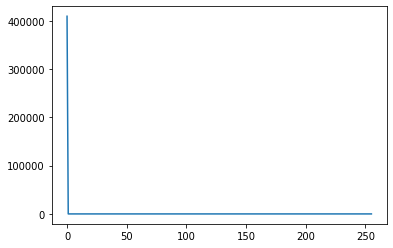

In [ ]:
from matplotlib import pyplot as plt
plt.plot(histg)
plt.show()

In [ ]:
histg.size
histg.item(0)
img.shape[0]*img.shape[1]
if histg.item(0) == img.shape[0]*img.shape[1]:
   print("it's all 0")

it's all 0


In [ ]:
import time
def list_of_files(source_directory, source_extension):
    start_time = time.time()  
    files_list = []  
    counter = 0
    for path, subdirs, files in os.walk(source_directory):
        for name in files:
            #print(name)      
            if(name[-4:] == source_extension):
                counter = counter + 1
                #print(counter, os.path.join(path, name))
                files_list.append(os.path.join(path, name))
    execution_time = (time.time() - start_time)
    print('Execution time in seconds: ' + str(execution_time))                
    return(files_list)

l = list_of_files(slope_tif_tiles_jpgs_fp, ".jpg")

Execution time in seconds: 32.55981492996216


In [ ]:
#print(l, len(l))
import cv2
# store voids in a dictionary
voids = {}
# to find voids we need to check every jpg file, this takes a long time.
for jpg_file in l:
    if not jpg_file[:-10] in voids:
        jpg_img = cv2.imread(jpg_file)
        histg = cv2.calcHist([jpg_img],[0],None,[256],[0,256])
        if histg.item(0) == (jpg_img.shape[0]*jpg_img.shape[1]):
            print("it's all 0", jpg_file)
            # if a void jpg is found, add it to the dictionary.  But there is no need to keep checking for that larger slope file.
            voids[jpg_file[:-10]]=jpg_file[:-10]
            r = int(jpg_file[-9:-7])
print(voids)

it's all 0 /content/drive/MyDrive/crane_pennsylvania/slope/pa_northcentral_2019_b19/tiles640/jpgs/USGS_1M_17_x68y466_PA_Northcentral_2019_B19/USGS_1M_17_x68y466_PA_Northcentral_2019_B19r00c00.jpg
it's all 0 /content/drive/MyDrive/crane_pennsylvania/slope/pa_northcentral_2019_b19/tiles640/jpgs/USGS_1M_17_x69y440_PA_Northcentral_2019_B19/USGS_1M_17_x69y440_PA_Northcentral_2019_B19r03c01.jpg
it's all 0 /content/drive/MyDrive/crane_pennsylvania/slope/pa_northcentral_2019_b19/tiles640/jpgs/USGS_1M_17_x70y440_PA_Northcentral_2019_B19/USGS_1M_17_x70y440_PA_Northcentral_2019_B19r01c12.jpg
it's all 0 /content/drive/MyDrive/crane_pennsylvania/slope/pa_northcentral_2019_b19/tiles640/jpgs/USGS_1M_17_x69y466_PA_Northcentral_2019_B19/USGS_1M_17_x69y466_PA_Northcentral_2019_B19r00c00.jpg
it's all 0 /content/drive/MyDrive/crane_pennsylvania/slope/pa_northcentral_2019_b19/tiles640/jpgs/USGS_1M_17_x70y466_PA_Northcentral_2019_B19/USGS_1M_17_x70y466_PA_Northcentral_2019_B19r00c00.jpg
it's all 0 /content/

In [ ]:
my_array = [[0]*16]*16
print(my_array[1][1])

0
